In [34]:
import json
import matplotlib.pyplot as plt

def plot_evaluation_metrics(dataset_name, known_rate, file_path='evaluation_results.json'):
    # Load the JSON data
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    # Filter for specified dataset and known_rate
    filtered_data = [entry for entry in data if entry['dataset'] == dataset_name and entry['known_rate'] == known_rate]
    
    # Prepare data for plotting
    u_values = [entry['u'] for entry in filtered_data]
    if 'test_f1-mean' in filtered_data[0]:  # Check if F1 score is used
        test_metric_means = [entry['test_f1-mean'] for entry in filtered_data]
        test_metric_stds = [entry['test_f1-std'] for entry in filtered_data]
        metric_label = 'F1 Mean'
    else:  # Use R2 score
        test_metric_means = [entry['test_r2-mean'] for entry in filtered_data]
        test_metric_stds = [entry['test_r2-std'] for entry in filtered_data]
        metric_label = 'R2 Mean'
    
    # Create plot
    plt.figure(figsize=(4, 3))
    plt.errorbar(u_values, test_metric_means, yerr=test_metric_stds, fmt='-o', capsize=5, label=f'{metric_label} ± Std')
    plt.title(f'{dataset_name.capitalize()} Dataset Known Rate {known_rate} - {metric_label}')
    plt.xlabel('U (or J) Values')
    plt.ylabel(f'Test {metric_label}')
    plt.grid(True)
    plt.show()

# Example usage:
# plot_evaluation_metrics('miniboone', 0.6)


In [37]:
import json
import matplotlib.pyplot as plt

def plot_evaluation_metrics(dataset_name, known_rate, file_path='evaluation_results.json'):
    # Load the JSON data
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    # Filter for specified dataset and known_rate
    filtered_data = [entry for entry in data if entry['dataset'] == dataset_name and entry['known_rate'] == known_rate]
    
    # Check if data exists
    if not filtered_data:
        print(f"No data available for dataset: {dataset_name} with known rate: {known_rate}")
        return
    
    # Prepare data for plotting
    u_values = [entry['u'] for entry in filtered_data]
    if 'test_f1-mean' in filtered_data[0]:  # Check if F1 score is used
        test_metric_means = [entry['test_f1-mean'] for entry in filtered_data]
        test_metric_stds = [entry['test_f1-std'] for entry in filtered_data]
        metric_label = 'F1 Mean'
    else:  # Use R2 score
        test_metric_means = [entry['test_r2-mean'] for entry in filtered_data]
        test_metric_stds = [entry['test_r2-std'] for entry in filtered_data]
        metric_label = 'R2 Mean'
    
    # Plotting logic
    plt.errorbar(u_values, test_metric_means, yerr=test_metric_stds, fmt='-o', capsize=5, label=f'{metric_label} ± Std')
    plt.title(f'{dataset_name.capitalize()} Rate {known_rate}')
    plt.xlabel('U (or J) Values')
    plt.ylabel(f'{metric_label}')
    plt.grid(True)

def plot_multiple_datasets(dataset_names, known_rates, file_path='evaluation_results.json'):
    rows = len(dataset_names) * len(known_rates)
    cols = 2  # Number of plots per row
    plt.figure(figsize=(5 * cols, 5 * (rows // cols + (rows % cols > 0))))
    i = 1
    for dataset_name in dataset_names:
        for rate in known_rates:
            plt.subplot(rows // cols + (rows % cols > 0), cols, i)
            print(f"Plotting for dataset: {dataset_name} with known rate: {rate}")
            plot_evaluation_metrics(dataset_name, rate, file_path)
            i += 1
    plt.tight_layout()
    plt.show()

# Example usage:
# dataset_names = ['miniboone', 'abalone', 'adult']
# known_rates = [0.6, 0.9]
# plot_multiple_datasets(dataset_names, known_rates)


Plotting for dataset: abalone with known rate: 0.6
Plotting for dataset: abalone with known rate: 0.9
Plotting for dataset: adult with known rate: 0.6
Plotting for dataset: adult with known rate: 0.9
Plotting for dataset: california with known rate: 0.6
Plotting for dataset: california with known rate: 0.9
Plotting for dataset: buddy with known rate: 0.6
Plotting for dataset: buddy with known rate: 0.9
Plotting for dataset: cardio with known rate: 0.6
Plotting for dataset: cardio with known rate: 0.9
Plotting for dataset: churn2 with known rate: 0.6
Plotting for dataset: churn2 with known rate: 0.9
Plotting for dataset: diabetes with known rate: 0.6
Plotting for dataset: diabetes with known rate: 0.9
Plotting for dataset: gesture with known rate: 0.6
Plotting for dataset: gesture with known rate: 0.9
Plotting for dataset: higgs-small with known rate: 0.6
Plotting for dataset: higgs-small with known rate: 0.9
Plotting for dataset: house with known rate: 0.6
Plotting for dataset: house w

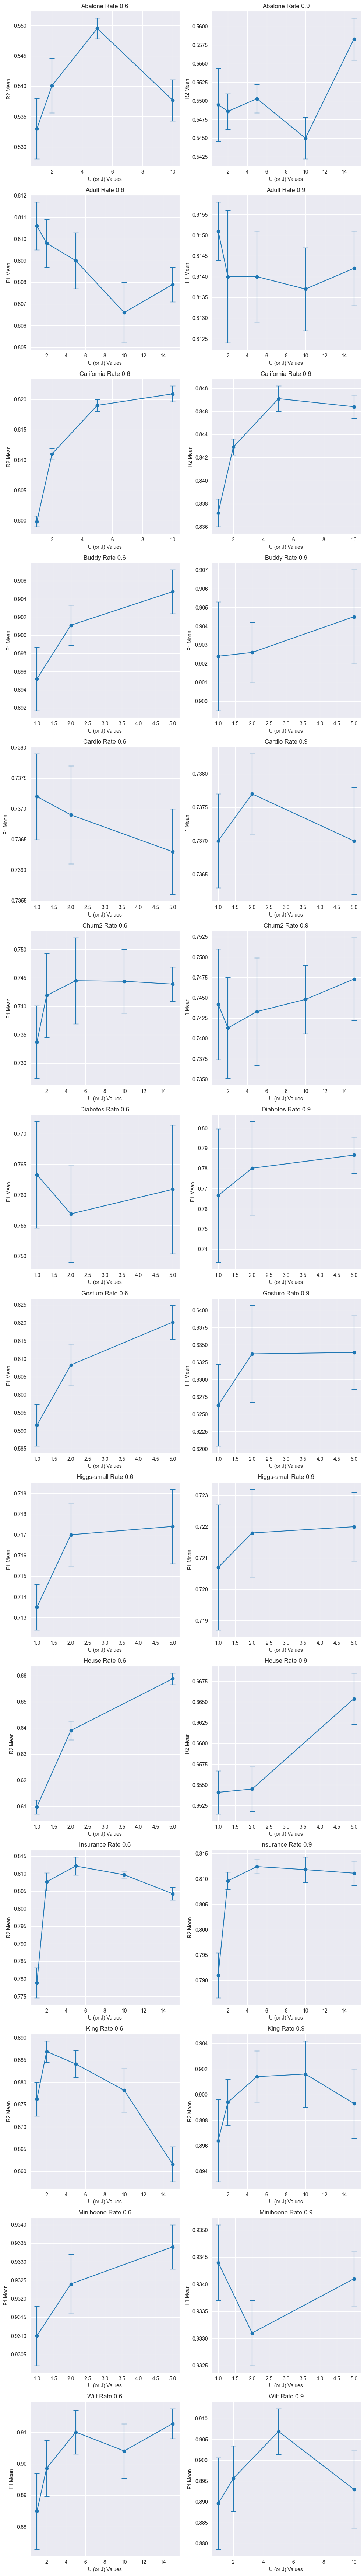

In [38]:
datasets = ["abalone", "adult", "california", "buddy", "cardio", "churn2", "diabetes", 
            "gesture", "higgs-small", "house", "insurance", "king", "miniboone", "wilt"]
known_rates = [0.6, 0.9]
plot_multiple_datasets(datasets, known_rates)

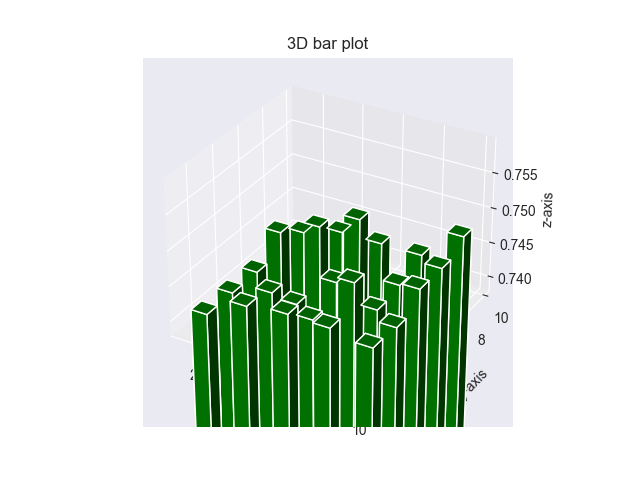

In [23]:
# creating 3d bar plot using matplotlib  
# in python 
  
# to interact  with plot 
%matplotlib widget 
  
# importing required libraries 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import numpy as np 
  
# Given dictionary
data_means = {
    ("1", "1"): 0.7413, ("1", "3"): 0.7413, ("1", "5"): 0.7413, ("1", "7"): 0.7442, ("1", "9"): 0.7413,
    ("3", "1"): 0.7443, ("3", "3"): 0.7431, ("3", "5"): 0.7383, ("3", "7"): 0.7467, ("3", "9"): 0.7430,
    ("5", "1"): 0.7450, ("5", "3"): 0.7410, ("5", "5"): 0.7433, ("5", "7"): 0.7494, ("5", "9"): 0.7430,
    ("7", "1"): 0.7449, ("7", "3"): 0.7481, ("7", "5"): 0.7411, ("7", "7"): 0.7416, ("7", "9"): 0.7430,
    ("9", "1"): 0.7440, ("9", "3"): 0.7436, ("9", "5"): 0.7459, ("9", "7"): 0.7458, ("9", "9"): 0.7474
}

# Processing to xyzs and dxyz
xs = [int(key[0]) for key in data_means]
ys = [int(key[1]) for key in data_means]
zs = [0] * len(data_means)  # Starting z at 0 for all bars
dx = [0.8] * len(data_means)  # Width along x-axis
dy = [0.8] * len(data_means)  # Width along y-axis
dz = [value for value in data_means.values()]  # Heights of the bars

  
# creating figure 
figg = plt.figure() 
ax = figg.add_subplot(111, projection='3d') 
  
# creating the plot 
plot_geeks = ax.bar3d(xs, ys, zs, dx,  
                      dy, dz, color='green') 
  
# setting title and labels 
ax.set_zlim(bottom=min(dz), top=max(dz) + 0.01)

ax.set_title("3D bar plot") 
ax.set_xlabel('x-axis') 
ax.set_ylabel('y-axis') 
ax.set_zlabel('z-axis') 
  
# displaying the plot 
plt.show() 

In [15]:
!pip install ipympl


  Obtaining dependency information for ipympl from https://files.pythonhosted.org/packages/d8/50/d6f4e7eb0e7d198b431d8259bc9a6035f879d4df487448b196cdf1e84155/ipympl-0.9.4-py3-none-any.whl.metadata
  Obtaining dependency information for ipython-genutils from https://files.pythonhosted.org/packages/fa/bc/9bd3b5c2b4774d5f33b2d544f1460be9df7df2fe42f352135381c347c69a/ipython_genutils-0.2.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 578.5 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


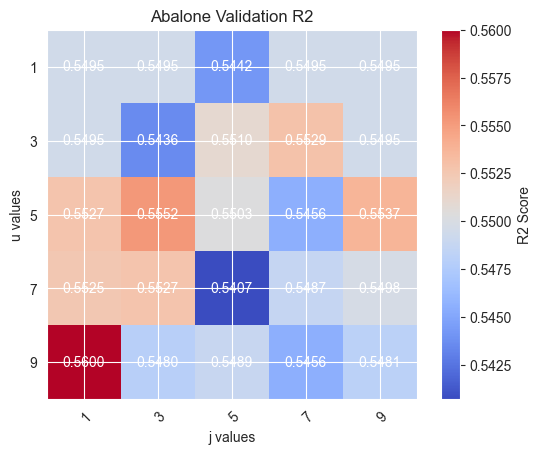

In [16]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON data
with open("evaluation_results_100_13579.json") as file:
    data = json.load(file)

# Define a function to parse the dataset and extract the required metrics
def parse_dataset(data, dataset_name, metric):
    # Initialize the storage for metric values and the parameters u, j
    metric_values = np.zeros((5, 5))
    u_values = j_values = [1, 3, 5, 7, 9]

    # Populate the metric values based on the u, j combinations
    for entry in data:
        if entry['dataset'] == dataset_name:
            u_index = u_values.index(entry['u'])
            j_index = j_values.index(entry['j'])
            metric_values[u_index, j_index] = entry[metric + '-mean']

    return metric_values, u_values, j_values

# Extract data for the two datasets
# churn2_metrics, u_vals_churn, j_vals_churn = parse_dataset(data, "churn2", "test_f1")
abalone_metrics, u_vals_abalone, j_vals_abalone = parse_dataset(data, "abalone", "test_r2")
# adult_metrics, u_vals_adult, j_vals_adult = parse_dataset(data, "adult", "test_f1")
# insurance_metrics, u_vals_insurance, j_vals_insurance= parse_dataset(data, "insurance", "test_r2")
# king_metrics, u_vals_king, j_vals_king = parse_dataset(data, "king", "test_r2")
# wilt_metrics, u_vals_wilt, j_vals_wilt = parse_dataset(data, "wilt", "test_f1")

# Plotting function for heatmaps
def plot_heatmap(data, u_vals, j_vals, title, xlabel, ylabel, metric_label):
    fig, ax = plt.subplots()
    im = ax.imshow(data, cmap='coolwarm')

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(j_vals)), labels=j_vals)
    ax.set_yticks(np.arange(len(u_vals)), labels=u_vals)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(u_vals)):
        for j in range(len(j_vals)):
            text = ax.text(j, i, f'{data[i, j]:.4f}',
                           ha="center", va="center", color="w")

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.colorbar(im, ax=ax, label=metric_label)
    plt.show()

# Generate heatmaps for each dataset
# plot_heatmap(churn2_metrics, u_vals_churn, j_vals_churn, 'Churn2 Validation F1-Score', 'j values', 'u values', 'F1 Score')
plot_heatmap(abalone_metrics, u_vals_abalone, j_vals_abalone, 'Abalone Validation R2', 'j values', 'u values', 'R2 Score')
# plot_heatmap(adult_metrics, u_vals_adult, j_vals_adult, 'Adult Validation F1-score', 'j values', 'u values', 'F1 Score')
# plot_heatmap(insurance_metrics, u_vals_insurance, j_vals_insurance, 'Insurance Validation R2-Score', 'j values', 'u values', 'R2 Score')
# plot_heatmap(king_metrics, u_vals_king, j_vals_king,'King Validation R2-Score', 'j values', 'u values', 'R2 Score')
# plot_heatmap(wilt_metrics, u_vals_wilt, j_vals_wilt,'Wilt Validation F1-Score', 'j values', 'u values', 'F1 Score')


In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON data
with open("evaluation_results_100_seed_417.json") as file:
    data = json.load(file)

# Define a function to parse the dataset and extract the required metrics
def parse_dataset(data, dataset_name, metric):
    # Initialize the storage for metric values and the parameters u, j
    metric_values = np.zeros((5, 5))
    u_values = j_values = [1, 3, 5, 7, 9]

    # Populate the metric values based on the u, j combinations
    for entry in data:
        if entry['dataset'] == dataset_name:
            u_index = u_values.index(entry['u'])
            j_index = j_values.index(entry['j'])
            metric_values[u_index, j_index] = entry[metric + '-mean']

    return metric_values, u_values, j_values

# Extract data for the two datasets
# churn2_metrics, u_vals_churn, j_vals_churn = parse_dataset(data, "churn2", "test_f1")
abalone_metrics_1, u_vals_abalone, j_vals_abalone = parse_dataset(data, "abalone", "test_r2")
# adult_metrics, u_vals_adult, j_vals_adult = parse_dataset(data, "adult", "test_f1")
# insurance_metrics, u_vals_insurance, j_vals_insurance= parse_dataset(data, "insurance", "test_r2")
# king_metrics, u_vals_king, j_vals_king = parse_dataset(data, "king", "test_r2")
# wilt_metrics, u_vals_wilt, j_vals_wilt = parse_dataset(data, "wilt", "test_f1")

# Plotting function for heatmaps
def plot_heatmap(data, u_vals, j_vals, title, xlabel, ylabel, metric_label):
    fig, ax = plt.subplots()
    im = ax.imshow(data, cmap='coolwarm')

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(j_vals)), labels=j_vals)
    ax.set_yticks(np.arange(len(u_vals)), labels=u_vals)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(u_vals)):
        for j in range(len(j_vals)):
            text = ax.text(j, i, f'{data[i, j]:.4f}',
                           ha="center", va="center", color="w")

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.colorbar(im, ax=ax, label=metric_label)
    plt.show()

# Generate heatmaps for each dataset
# plot_heatmap(churn2_metrics, u_vals_churn, j_vals_churn, 'Churn2 Validation F1-Score', 'j values', 'u values', 'F1 Score')
plot_heatmap(abalone_metrics_1, u_vals_abalone, j_vals_abalone, 'Abalone Validation R2', 'j values', 'u values', 'R2 Score')
# plot_heatmap(adult_metrics, u_vals_adult, j_vals_adult, 'Adult Validation F1-score', 'j values', 'u values', 'F1 Score')
# plot_heatmap(insurance_metrics, u_vals_insurance, j_vals_insurance, 'Insurance Validation R2-Score', 'j values', 'u values', 'R2 Score')
# plot_heatmap(king_metrics, u_vals_king, j_vals_king,'King Validation R2-Score', 'j values', 'u values', 'R2 Score')
# plot_heatmap(wilt_metrics, u_vals_wilt, j_vals_wilt,'Wilt Validation F1-Score', 'j values', 'u values', 'F1 Score')

plot_heatmap((abalone_metrics_1 + abalone_metrics)/2, u_vals_abalone, j_vals_abalone, 'Abalone Validation R2', 'j values', 'u values', 'R2 Score')